In [47]:
# import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Reading the data
df= pd.read_csv(r'/Users/anandkumar/Documents/Anand Data Analyst content/Python/movies.csv')


In [102]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Date,Released_Country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,"April 27, 2018",United States


In [103]:
# Checking if there is any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%
Released_Date - 0%
Released_Country - 0%


In [104]:
# Data Types for our columns

print(df.dtypes)

name                 object
rating               object
genre                object
year                  int64
released             object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget              float64
gross               float64
company              object
runtime             float64
Released_Date        object
Released_Country     object
dtype: object


In [107]:
# Split the released column into Released_Date, Released_Country
df[['Released_Date', 'Released_Country']] = df['released'].str.split('(', 1, expand=True)

#Convert the date column to datetime
df['Released_Date'] = pd.to_datetime(df['Date_Released'])

#Display the Data to verify the changes

df["Released_Country"] = df["Released_Country"].str[:-1]
display(df)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Date,Released_Country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,"April 27, 2018",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00,"October 23, 2020",United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00,"February 7, 2020",United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00,"October 1, 2020",United States


In [30]:
#Below command can be used to drop column "released"
#df.drop(columns=["Date_Released"], inplace=True)



In [108]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Date,Released_Country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,"April 27, 2018",United States


In [76]:
# Order our Data a little bit to see

df=df.sort_values(by=['gross'], inplace=False, ascending=False)
display(df)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Date,Released_Country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,"April 27, 2018",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00,"October 23, 2020",United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00,"February 7, 2020",United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00,"October 1, 2020",United States


In [53]:
#setting to show values as numbers instead of 2.847246e+09  format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(df)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00


In [54]:
#dropping Duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00


<Axes: >

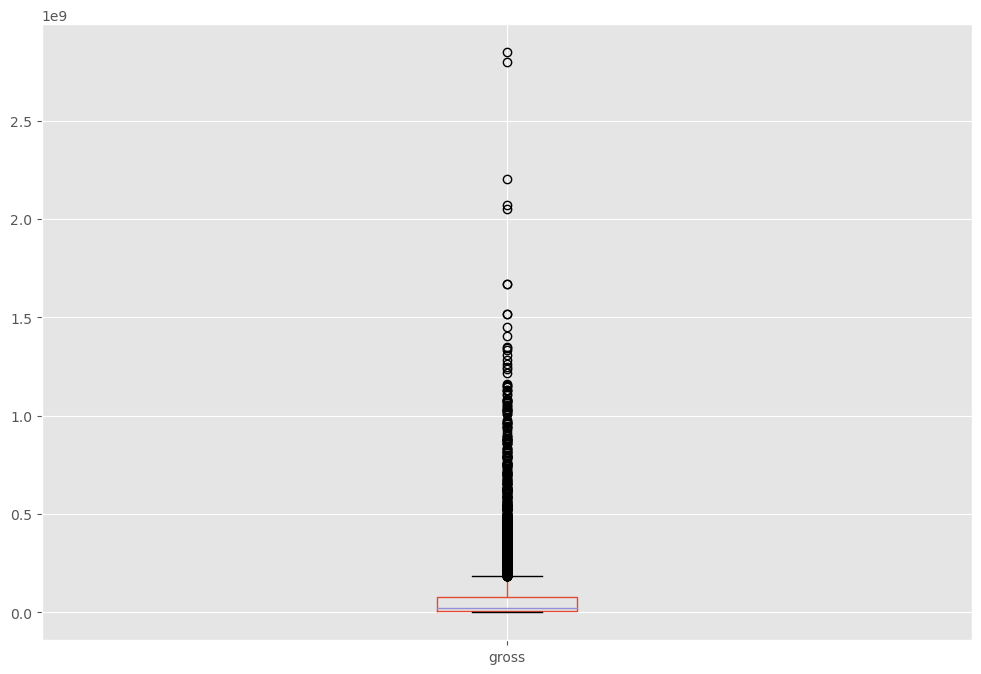

In [55]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [ ]:
#BUdget high Corelation
#Company high corelation


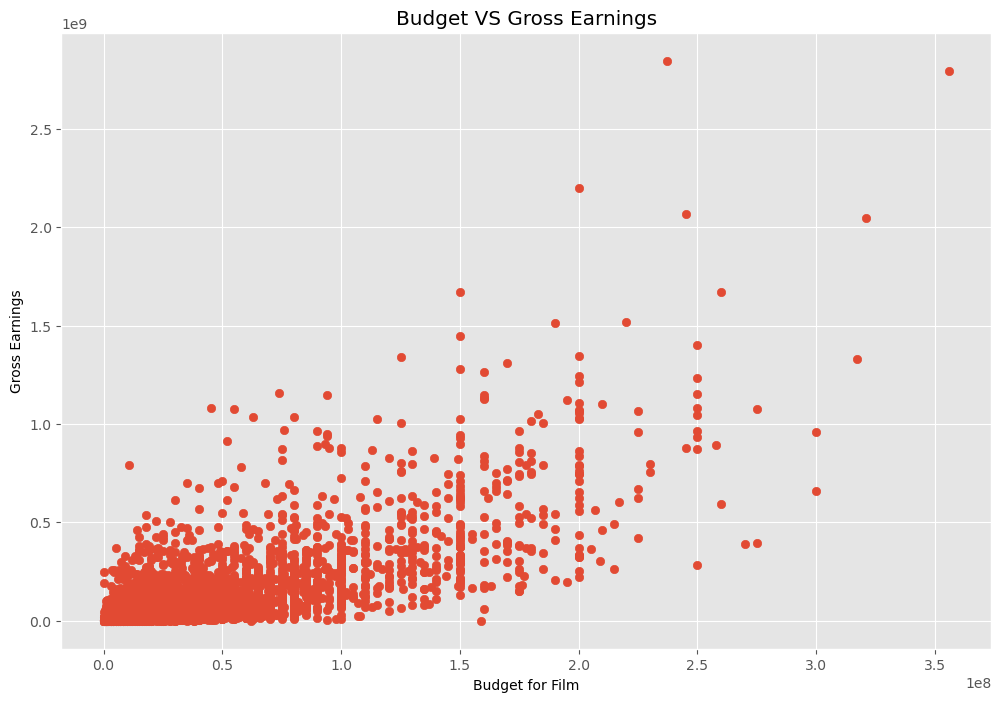

In [77]:
#Scatter Plot with Buget vs Gross

plt.scatter(x=df['budget'],y=df['gross'] )
plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [109]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Date,Released_Country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,"April 27, 2018",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00,"October 23, 2020",United States
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00,"February 7, 2020",United States
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00,"October 1, 2020",United States


<Axes: xlabel='budget', ylabel='gross'>

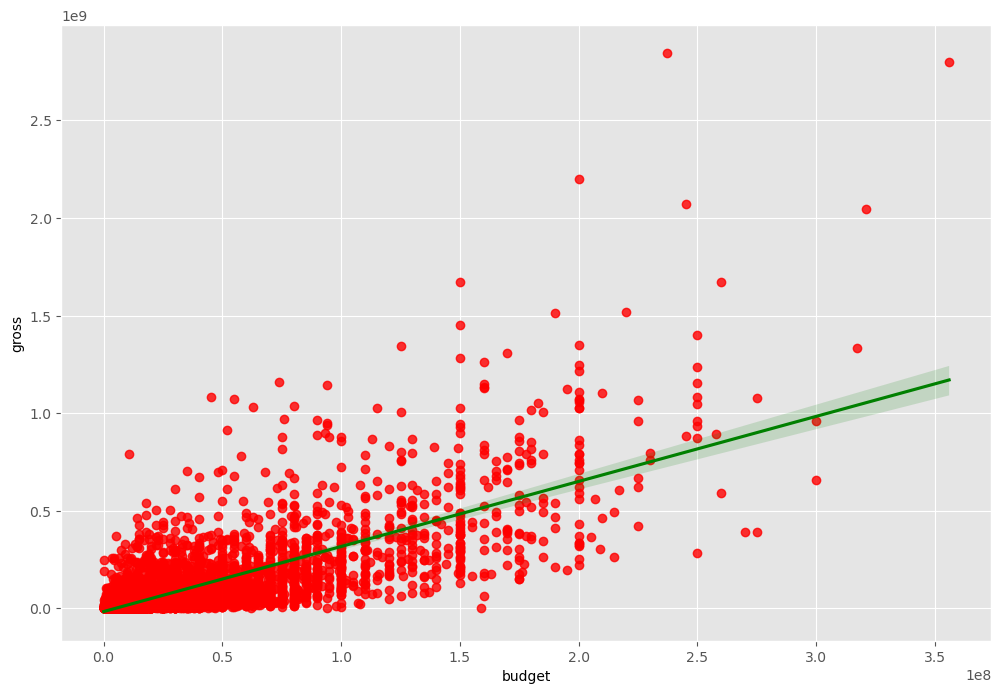

In [79]:
#Plot Buget vs Gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"green"})

In [ ]:
#Diving into Corelation

In [81]:
#Numeric values Corelaion
df.corr(method ='pearson')

/var/folders/6b/frjl1ltd4j34212c077lgrl80000gn/T/ipykernel_11870/940117708.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.33,0.26,0.12
score,0.10,1.00,0.41,0.08,0.19,0.40
votes,0.22,0.41,1.00,0.44,0.63,0.31
budget,0.33,0.08,0.44,1.00,0.74,0.32
gross,0.26,0.19,0.63,0.74,1.00,0.25
runtime,0.12,0.40,0.31,0.32,0.25,1.00


In [83]:
df.corr(method ='kendall')

/var/folders/6b/frjl1ltd4j34212c077lgrl80000gn/T/ipykernel_11870/1080062093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='kendall')


,year,score,votes,budget,gross,runtime
year,1.00,0.07,0.33,0.22,0.20,0.10
score,0.07,1.00,0.30,-0.00,0.09,0.28
votes,0.33,0.30,1.00,0.35,0.55,0.20
budget,0.22,-0.00,0.35,1.00,0.51,0.24
gross,0.20,0.09,0.55,0.51,1.00,0.17
runtime,0.10,0.28,0.20,0.24,0.17,1.00


In [84]:
df.corr(method ='spearman')

/var/folders/6b/frjl1ltd4j34212c077lgrl80000gn/T/ipykernel_11870/1164575377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.47,0.32,0.29,0.14
score,0.10,1.00,0.43,-0.00,0.13,0.40
votes,0.47,0.43,1.00,0.50,0.74,0.29
budget,0.32,-0.00,0.50,1.00,0.69,0.34
gross,0.29,0.13,0.74,0.69,1.00,0.25
runtime,0.14,0.40,0.29,0.34,0.25,1.00


/var/folders/6b/frjl1ltd4j34212c077lgrl80000gn/T/ipykernel_11870/2752691297.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method ='pearson')


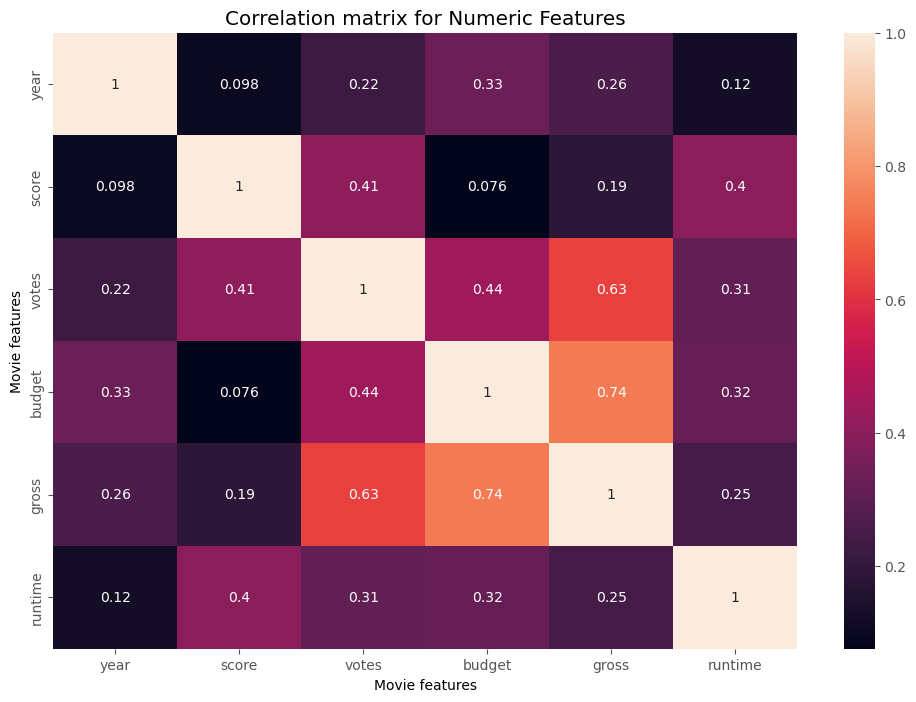

In [86]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [88]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df_numarise=df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
display(df_numarise)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Date,Released_Country
name,1.00,0.30,0.14,0.25,0.65,0.11,0.60,0.72,0.78,0.65,0.19,0.03,0.84,0.68,0.07,0.56,0.28
rating,0.30,1.00,-0.01,0.04,0.24,-0.07,0.12,0.24,0.26,0.24,0.16,0.05,0.30,0.28,0.03,0.17,0.14
genre,0.14,-0.01,1.00,0.09,0.09,0.06,0.15,0.09,0.09,0.10,-0.07,0.08,0.12,0.06,0.01,0.11,0.00
year,0.25,0.04,0.09,1.00,0.32,0.08,0.33,0.17,0.21,0.23,-0.05,0.03,0.19,0.12,0.03,0.41,-0.09
released,0.65,0.24,0.09,0.32,1.00,0.07,0.45,0.50,0.55,0.48,0.16,0.02,0.56,0.47,0.05,0.87,0.42
score,0.11,-0.07,0.06,0.08,0.07,1.00,0.23,0.15,0.10,0.11,-0.10,-0.00,0.08,0.04,0.04,0.10,-0.04
votes,0.60,0.12,0.15,0.33,0.45,0.23,1.00,0.50,0.52,0.45,0.05,-0.02,0.50,0.39,0.07,0.45,0.07
director,0.72,0.24,0.09,0.17,0.50,0.15,0.50,1.00,0.70,0.58,0.20,-0.03,0.60,0.61,0.08,0.42,0.24
writer,0.78,0.26,0.09,0.21,0.55,0.10,0.52,0.70,1.00,0.59,0.20,-0.01,0.66,0.62,0.06,0.46,0.25
star,0.65,0.24,0.10,0.23,0.48,0.11,0.45,0.58,0.59,1.00,0.22,-0.01,0.52,0.57,0.07,0.41,0.19


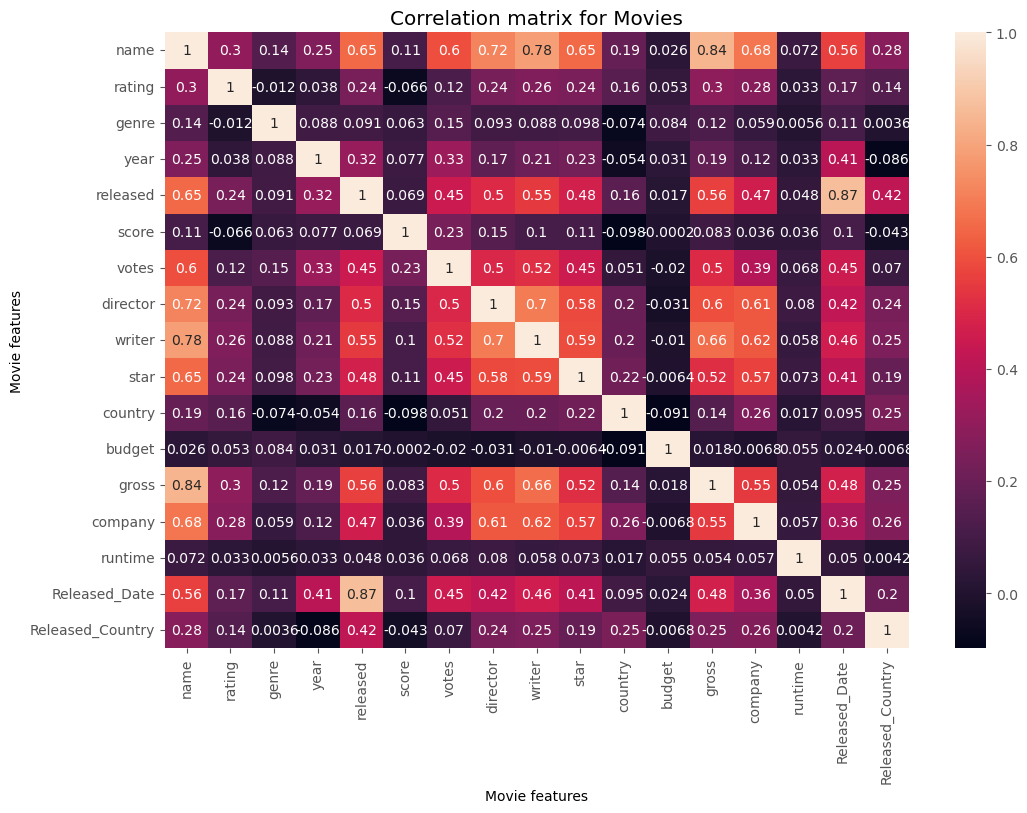

In [89]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [90]:

correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name              name               1.00
                  rating             0.30
                  genre              0.14
                  year               0.25
                  released           0.65
                                     ... 
Released_Country  gross              0.25
                  company            0.26
                  runtime            0.00
                  Released_Date      0.20
                  Released_Country   1.00
Length: 289, dtype: float64


In [92]:
sorted_pairs = corr_pairs.sort_values()

print(sorted_pairs)

score             country            -0.10
country           score              -0.10
                  budget             -0.09
budget            country            -0.09
Released_Country  year               -0.09
                                      ... 
year              year                1.00
genre             genre               1.00
rating            rating              1.00
Released_Date     Released_Date       1.00
Released_Country  Released_Country    1.00
Length: 289, dtype: float64


In [93]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

released          director           0.50
director          released           0.50
votes             gross              0.50
gross             votes              0.50
                  star               0.52
star              gross              0.52
votes             writer             0.52
writer            votes              0.52
                  released           0.55
released          writer             0.55
gross             company            0.55
company           gross              0.55
name              Released_Date      0.56
Released_Date     name               0.56
gross             released           0.56
released          gross              0.56
star              company            0.57
company           star               0.57
star              director           0.58
director          star               0.58
star              writer             0.59
writer            star               0.59
name              votes              0.60
votes             name            

In [95]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('float64') 

CompanyGrossSumSorted

company
Warner Bros.                56491421806.00
Universal Pictures          52514188890.00
Columbia Pictures           43008941346.00
Paramount Pictures          40493607415.00
Twentieth Century Fox       40257053857.00
Walt Disney Pictures        36327887792.00
New Line Cinema             19883797684.00
Marvel Studios              15065592411.00
DreamWorks Animation        11873612858.00
Touchstone Pictures         11795832638.00
Dreamworks Pictures         11635441081.00
Metro-Goldwyn-Mayer (MGM)    9230230105.00
Summit Entertainment         8373718838.00
Pixar Animation Studios      7886344526.00
Fox 2000 Pictures            7443502667.00
Name: gross, dtype: float64

<Axes: xlabel='gross', ylabel='genre'>

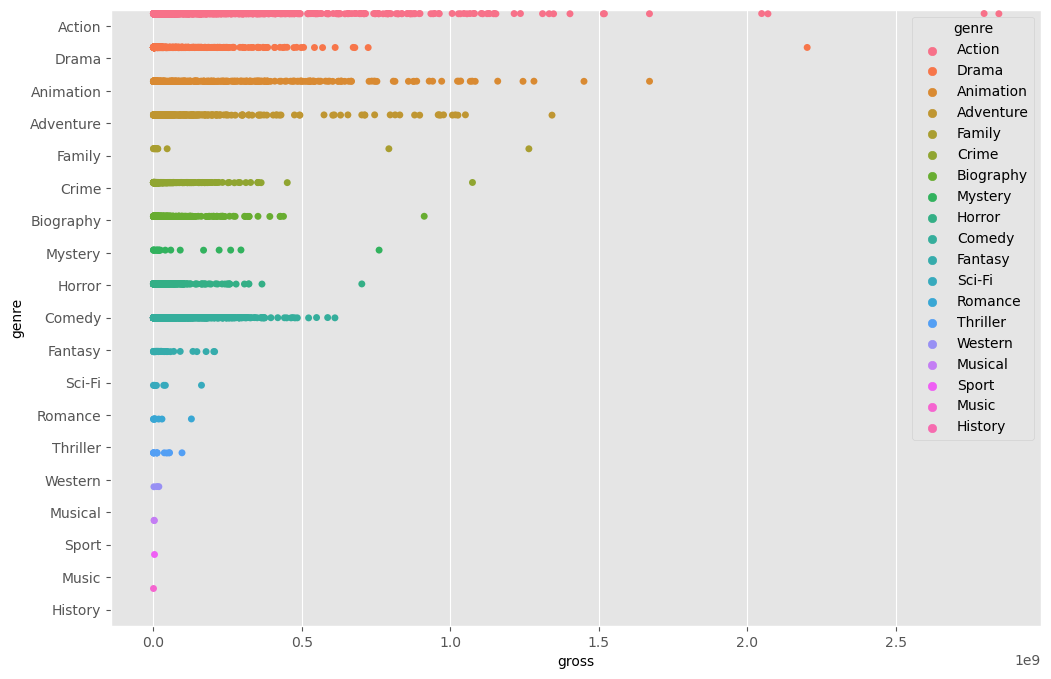

In [101]:
# Define a color palette for the genres
palette = sns.color_palette("Set2", len(df['genre'].unique()))
#sns.stripplot(x="gross", y="genre", data=df,dodge=True)
sns.stripplot(x="gross", y="genre", hue="genre", data=df, dodge=True)
